In [11]:
import numpy as np
import nibabel as nib
import os.path as op
from matplotlib.pyplot import imread
from xml.etree import ElementTree as ET
import sys
import os

In [25]:
data_dir = 'F:\\FTP_IMPORTS\\pipeline_test\\fly1\\TSeries-04272019-1414-007'
xml_file = 'F:\\FTP_IMPORTS\\pipeline_test\\fly1\\TSeries-04272019-1414-007\\TSeries-04272019-1414-007.xml'
out_fname = 'test_python.nii'

In [5]:
tree = ET.parse(xml_file)
root = tree.getroot()
root.tag == 'PVScan'

In [16]:
head, tail = os.path.split(xml_file)

In [28]:
xml_file[-3:]

'xml'

In [25]:
os.listdir(data_dir)

['References',
 'test.nii',
 'test_python.nii',
 'TSeries-04272019-1414-007.env',
 'TSeries-04272019-1414-007.nii',
 'TSeries-04272019-1414-007.xml',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000001.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000002.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000003.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000004.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000005.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000006.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000007.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000008.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000009.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000010.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000011.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000012.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000013.ome.tif',
 'TSeries-04272019-1414-007_Cycle00001_Ch1_000014.ome.tif',
 'TSeries-

In [22]:
xml_file[:-4] + '.nii'

'F:\\FTP_IMPORTS\\pipeline_test\\fly1\\TSeries-04272019-1414-007\\TSeries-04272019-1414-007.nii'

In [3]:
data_dir = 'F:\\FTP_IMPORTS\\pipeline_test\\fly1\\TSeries-04272019-1414-007'
xml_file = 'F:\\FTP_IMPORTS\\pipeline_test\\fly1\\TSeries-04272019-1414-007\\TSeries-04272019-1414-007.xml'
out_fname = 'test_python.nii'

tree = ET.parse(xml_file)
root = tree.getroot()
# Get all volumes
sequences = root.findall('Sequence')
volumes_img = []
for sequence in sequences:
    # For given volume, get all frames
    frames = sequence.findall('Frame')
    frames_img = []
    for frame in frames:
        # For a given frame, get all channels
        files = frame.findall('File')
        channels_img = []
        for file in files:
            filename = file.get('filename')
            fullfile = op.join(data_dir, filename)
            img = imread(fullfile)
            channels_img.append(img)
        frames_img.append(channels_img)
    volumes_img.append(frames_img)
    
volumes_img = np.asarray(volumes_img)
volumes_img = np.moveaxis(volumes_img,1,-1)
volumes_img = np.moveaxis(volumes_img,0,-1)
volumes_img = np.moveaxis(volumes_img,0,-1)
volumes_img = np.swapaxes(volumes_img,0,1)

aff = np.eye(4)
img = nib.Nifti1Image(volumes_img, aff)
img.to_filename(op.join(data_dir,out_fname))

In [ ]:
        try:
            frame.findall('File')[1].get('filename')
        except IndexError:
        print('f')

f


In [12]:
np.shape(volumes_img)
# Currently in t,z,x/y,x/y
# Want y,x,z,t

(144, 23, 128, 128)

In [28]:
volumes_img = np.asarray(volumes_img)
volumes_img = np.moveaxis(volumes_img,0,-1)
volumes_img = np.moveaxis(volumes_img,0,2)
volumes_img = np.swapaxes(volumes_img,0,1)

aff = np.eye(4)
img = nib.Nifti1Image(volumes_img, aff)
img.to_filename(op.join(data_dir,out_fname))

In [23]:
volumes_img.shape

(128, 128, 23, 144)

In [13]:
import matplotlib.pyplot as plt

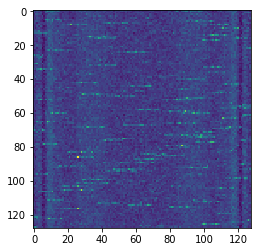

In [15]:
plt.imshow(volumes_img[0,0,:,:])
plt.show()

In [ ]:
np.swapaxes()

In [ ]:


shard = root.findall('PVStateShard')[0]
pixdims = {}
for pvsv in shard.findall('PVStateValue'):
    if pvsv.get('key') ==  'micronsPerPixel':
        for iv in pvsv.findall('IndexedValue'):
            pixdims[iv.get('index')] = float(iv.get('value'))
        break
#
vol = np.array(frames_img)
vol = np.transpose(vol, axes=[2,1,0])[...,::-1]
aff = np.eye(4)
aff[0,0] = pixdims['XAxis']
aff[1,1] = pixdims['YAxis']
aff[2,2] = pixdims['ZAxis']
img = nib.Nifti1Image(vol, aff)
img.to_filename(op.join(data_dir,out_fname))

In [29]:
aff = np.eye(4)
img = nib.Nifti1Image(volumes_img, aff)
img.to_filename(op.join(data_dir,out_fname))